<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/Simple_Linear_Regression_Basic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
!pip install opendatasets --quiet

In [3]:
import opendatasets as od 

url = 'https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset'
od.download(url)

Skipping, found downloaded files in "./years-of-experience-and-salary-dataset" (use force=True to force download)


In [4]:
salary_df = pd.read_csv('./salary/Salary_Data.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Clean Data

In [5]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
salary_df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

## Data Features

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [8]:
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    KFold
)

X_train, X_test, y_train, y_test = train_test_split(
    salary_df.drop(columns=['Salary']),
    salary_df.Salary,
    test_size=0.2,
    random_state=42,
    )


In [9]:
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=['YearsExperience'])
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=['YearsExperience'])

## Model

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
print('a slope: ', model.coef_)
print('b intercept: ', model.intercept_)

a slope:  [27151.53742583]
b intercept:  74207.625


In [12]:
test_preds = model.predict(X_test)

data = {
    'Actual': y_test,
    'Predicted': test_preds,
    'variance': y_test - test_preds
}
df1 = pd.DataFrame(data=data, columns=['Actual', 'Predicted', 'variance'])
print(df1)

      Actual      Predicted      variance
27  112635.0  115790.210113  -3155.210113
15   67938.0   71498.278095  -3560.278095
23  113812.0  102596.868661  11215.131339
17   83088.0   75267.804224   7820.195776
8    64445.0   55477.792045   8967.207955
9    57189.0   60189.699707  -3000.699707


## Testing predictions

In [13]:
# 2.2	39891.0
year = [2.2, 10, 11, 15]
pred = np.array([year]).reshape(-1, 1)
model.predict(pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([133941.00733683, 345722.99925834, 372874.53668417, 481480.68638751])

In [29]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
)

# test_preds = model.predict(X_test)
test_score = mean_absolute_error(X_test, test_preds)
print(test_score.round(3))

80136.557


In [15]:
train_preds = model.predict(X_train)
train_score = mean_absolute_error(X_train, train_preds)
print(train_score.round(3))

74207.625


Text(0, 0.5, 'Salary')

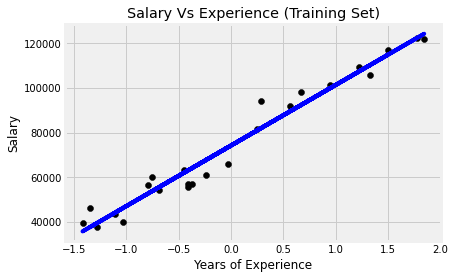

In [16]:
plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, train_preds, color='blue')
plt.title('Salary Vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

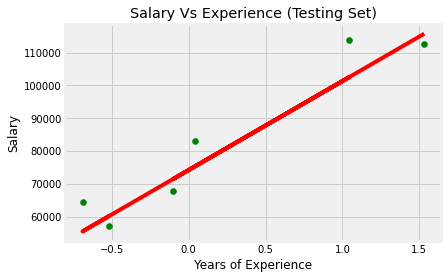

In [17]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, test_preds, color='red')
plt.title('Salary Vs Experience (Testing Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [18]:
from sklearn.metrics import r2_score

r2score = r2_score(y_test, test_preds).round(3) * 100
r2score

90.2

In [34]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, test_preds))
print('Mean Squared Error: ', mean_squared_error(y_test, test_preds))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, 
                                                              test_preds)))

Mean Absolute Error:  6286.453830757746
Mean Squared Error:  49830096.85590834
Root Mean Squared Error:  7059.043621901506


In [19]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(
    model,
    salary_df.drop(columns=['Salary']),
    salary_df.Salary,
    cv=kfolds,
    return_train_score=True,
    scoring='neg_mean_absolute_error'
)

cv_results

{'fit_time': array([0.00486326, 0.00199294, 0.00190997, 0.00189209, 0.00190544,
        0.0018847 , 0.00190067, 0.00189042, 0.00191617, 0.00188732]),
 'score_time': array([0.00312018, 0.00134301, 0.00134182, 0.00133324, 0.00134754,
        0.00129437, 0.00130272, 0.00136185, 0.00136542, 0.00132346]),
 'test_score': array([-6125.43034712, -6559.42371237, -2997.23592835, -6064.52973735,
        -6384.59489897, -3736.16178022, -3937.59997406, -1640.41521605,
        -1305.29796856, -8348.6628201 ]),
 'train_score': array([-4474.30932184, -4412.79865834, -4844.31306032, -4521.50026795,
        -4486.25197699, -4721.78634701, -4724.63407508, -4982.59014711,
        -5014.32376451, -4218.57038104])}

In [20]:
results = pd.DataFrame(data=cv_results)
results

,fit_time,score_time,test_score,train_score
0,0.004863,0.003120,-6125.430347,-4474.309322
1,0.001993,0.001343,-6559.423712,-4412.798658
2,0.001910,0.001342,-2997.235928,-4844.313060
3,0.001892,0.001333,-6064.529737,-4521.500268
4,0.001905,0.001348,-6384.594899,-4486.251977
5,0.001885,0.001294,-3736.161780,-4721.786347
6,0.001901,0.001303,-3937.599974,-4724.634075
7,0.001890,0.001362,-1640.415216,-4982.590147
8,0.001916,0.001365,-1305.297969,-5014.323765
9,0.001887,0.001323,-8348.662820,-4218.570381


In [21]:
results = results.assign(
    test_error = -1 * results.test_score,
    train_error = -1 * results.train_score,
)

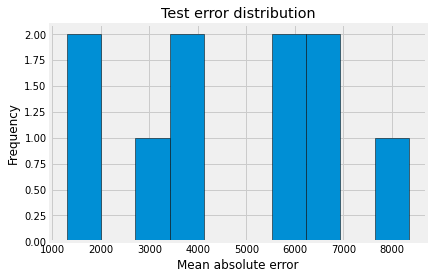

In [22]:
results["test_error"].plot.hist(bins=10, edgecolor="black")
plt.xlabel("Mean absolute error")
_ = plt.title("Test error distribution")

In [23]:
print(f"The mean cross-validated testing error is: "
      f"{results['test_error'].mean(): .3f}")

print(f"The standard deviation of the testing error is: "
      f"{results['test_error'].std():.3f}")

The mean cross-validated testing error is:  4709.935
The standard deviation of the testing error is: 2328.461


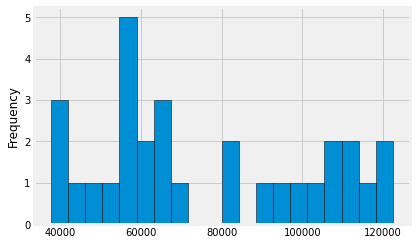

In [24]:
salary_df.Salary.plot.hist(bins=20, edgecolor="black")

In [25]:
print(f"The standard deviation of the target is: {salary_df.Salary.std():.2f}")

The standard deviation of the target is: 27414.43


In [26]:
# for p in model.get_params():
#   print(p)

In [27]:
from sklearn.model_selection import validation_curve


train_scores, test_scores = validation_curve(
    model,
    salary_df.drop(columns=['Salary']),
    salary_df.Salary,
    param_name='fit_intercept',
    param_range=np.logspace(-3, 2, num=30),
    cv=kfolds,
)

train_errors, test_errors = -train_scores, -test_scores

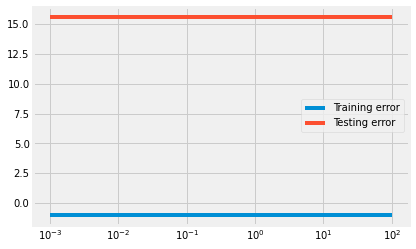

In [28]:
param_range=np.logspace(-3, 2, num=30)

plt.plot(param_range, train_errors.mean(axis=1), label='Training error')
plt.plot(param_range, test_errors.mean(axis=1), label='Testing error')
plt.legend()
plt.xscale("log")